<a href="https://colab.research.google.com/github/mukeshonlinesiitm/LLM/blob/main/Auto_Grad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Github

[Errno 2] No such file or directory: '/content/drive/MyDrive/Github'
/content


In [3]:
! git init titanic

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/titanic/.git/


In [4]:
%cd titanic/

/content/titanic


In [5]:
%ls -a

./  ../  .git/


In [7]:
! git status

On branch master

No commits yet

nothing to commit (create/copy files and use "git add" to track)


In [9]:
! git add "Auto Grad.ipynb"

fatal: pathspec 'Auto Grad.ipynb' did not match any files


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# creating function

 $f(x) = 3x^2 - 4x + 5$
 Gredient of $f(x)$

 $df(x)/d(x) = 6x-4$

 to find minima or maxima make  Gredient of $f(x) = 0 $

 $6x-4= 0$

 Point where minima occur $ x= 2/3$



In [ ]:
def f(x):
  return 3*x**2 - 4*x +5

In [ ]:
f(3)

20

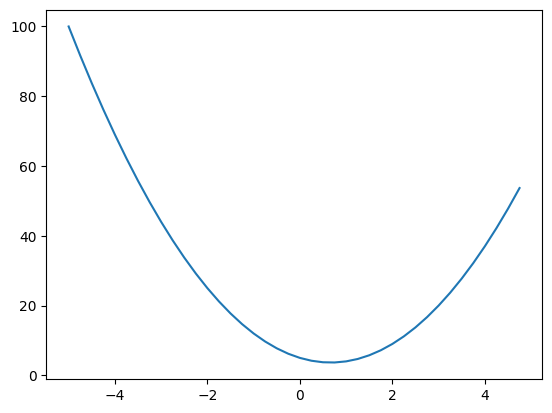

In [ ]:
x = np.arange(-5,5,0.25)
y = f(x)
plt.plot(x,y)

In [ ]:
h = 0.000001
x = 2/3
# check the same with limit
(f(x+h)-f(x))/h   # notice that value f(x) become 0 when x=2/3 where minima occur

2.999378523327323e-06

In [ ]:
# let some bit complex with multiple values
a = 2.0
b = -3.0
c = 10.0
d = a*b +c #  (Liner function y = mx + c)
print(d)

4.0


In [ ]:
# adding small change in a,b,c how d impact lets check

h = 0.0001
a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c
print(d1) # current value

print("===Small Change in a==")
a += h  # add small chage in a to check the impact on function value d
d2 = a*b + c
print(d2) # current value

# check the differen interm of limit
print((d2-d1)/h) # this consider as slope when change c

# why change value is approx -3.0
# reason is if partial derivate of (a*b)+c w.r.t a derivate will be b and b = -3.0 that why change is -3

4.0
===Small Change in a==
3.999699999999999
-3.000000000010772


In [ ]:
print("===Small Change in b==")
h = 0.0001
a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c
print(d1) # current value

b += h  # add small chage in c to check the impact on function value d

d2 = a*b + c
print(d2) # current value

# check the differen interm of limit
print((d2-d1)/h) # this consider as slope when change c


===Small Change in b==
4.0
4.0002
2.0000000000042206


In [ ]:
print("===Small Change in c==")
h = 0.0001
a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c
c += h  # add small chage in c to check the impact on function value d

d2 = a*b + c
print(d2) # current value

# check the differen interm of limit
print((d2-d1)/h) # this consider as slope when change c
# why no change as w.r.t as c become costant so no impact during grad

===Small Change in c==
4.0001
0.9999999999976694


In [ ]:
class Value :
  def __init__(self,data,_childern=(),_op='',label=''):
    self.data = data
    self._prev = set(_childern)
    self.label = label
    self._op = _op
    self.grad = 0

  def __repr__(self):
    return f"Value(data={self.data} ; Children ={self._prev} ; Label ={self.label})"

  def __add__(self,other):
    return Value(self.data + other.data, _childern =(self,other),_op='+')

  def __mul__(self,other):
    return Value(self.data * other.data, _childern =(self,other),_op='*')

In [ ]:
Value(2.0)

Value(data=2.0 ; Children =set() ; Label =)

In [ ]:
a = Value(2.0,label='a')
b = Value(-3.0,label='b')
c = Value(10.0,label='c')
e = a*b ; e.label ='e'
d = e + c ; d.label ='d'

f = Value(-2.0, label='f')

L = d * f ; L.label = 'L'
L

Value(data=-8.0 ; Children ={Value(data=4.0 ; Children ={Value(data=-6.0 ; Children ={Value(data=2.0 ; Children =set() ; Label =a), Value(data=-3.0 ; Children =set() ; Label =b)} ; Label =e), Value(data=10.0 ; Children =set() ; Label =c)} ; Label =d), Value(data=-2.0 ; Children =set() ; Label =f)} ; Label =L)

In [ ]:
print(L)
#print(e._prev)

Value(data=-8.0 ; Children ={Value(data=4.0 ; Children ={Value(data=-6.0 ; Children ={Value(data=2.0 ; Children =set() ; Label =a), Value(data=-3.0 ; Children =set() ; Label =b)} ; Label =e), Value(data=10.0 ; Children =set() ; Label =c)} ; Label =d), Value(data=-2.0 ; Children =set() ; Label =f)} ; Label =L)


In [ ]:
d.data

4.0

In [ ]:
draw_dot(L)

NameError: name 'draw_dot' is not defined

In [ ]:
# apply 1 time gradeint in
lr = 0.001
a.data += lr * a.grad
b.data += lr * b.grad
c.data += lr * c.grad
f.data += lr * f.grad


e = a*b
d = e + c
L = d * f
print(L.data)

-7.928064095999999


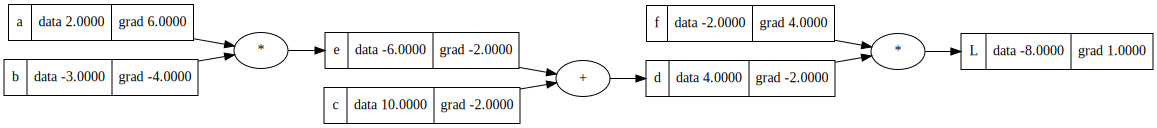

In [ ]:
draw_dot(L)

In [ ]:
L.grad = 1.0
d.grad = -2.0
f.grad = 4
e.grad = -2
c.grad = -2
a.grad = 6
b.grad = -4

In [ ]:
def lol():
  h = 0.001
  a = Value(2.0,label='a')
  b = Value(-3.0,label='b')
  c = Value(10.0,label='c')
  e = a*b ; e.label ='e'
  d = e + c ; d.label ='d'

  f = Value(-2.0, label='f')

  L = d * f ; L.label = 'L'
  L1 = L.data

  a = Value(2.0,label='a')
  b = Value(-3.0,label='b')
  c = Value(10.0,label='c')
  e = a*b ; e.label ='e'
  d = e + c  ; d.label ='d'
  #d = Value(d.data + h )

  f = Value(-2.0+h, label='f')

  L = d * f ; L.label = 'L'
  L2 = L.data

  print((L2-L1)/h)

lol()


3.9999999999995595


# Visulization

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f}" % (n.label, n.data,n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot